In [198]:
# 1. Cleanup
# Find the sample dataset of request logs in data/DataSample.csv. We consider records that have identical geoinfo and timest as suspicious.
# Please clean up the sample dataset by filtering out those questionable request records.

In [199]:
import pandas as pd

df_req = pd.read_csv('./data/DataSample.csv')

In [200]:
df_req.head(10)

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
5,4516693,2017-06-21 14:00:00.597,CA,ON,Kitchener,43.43810,-80.50990
6,4516771,2017-06-21 10:00:00.873,CA,ON,Sarnia,42.96100,-82.37300
7,4516831,2017-06-21 12:00:00.950,CA,ON,London,43.00910,-81.17650
8,4516915,2017-06-21 15:00:01.310,CA,ON,London,43.00910,-81.17650
9,4516953,2017-06-21 16:00:01.700,CA,ON,Kitchener,43.42780,-80.51350


In [201]:
# check labels for space content
df_req.columns.tolist()

['_ID', ' TimeSt', 'Country', 'Province', 'City', 'Latitude', 'Longitude']

In [202]:
# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
from datetime import datetime
df_req.rename(columns=lambda x: x.strip(), inplace=True)
df_req.columns.tolist()

['_ID', 'TimeSt', 'Country', 'Province', 'City', 'Latitude', 'Longitude']

In [203]:
from datetime import datetime

# function to convert time into timestamp
def get_timestamp(x):
    timestamp = datetime.timestamp(datetime.fromisoformat(x['TimeSt']))
    timestamp = '{:10.3f}'.format(timestamp)
    return timestamp

df_req['Timestamp'] = df_req.apply(get_timestamp, axis=1)
df_req

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,Timestamp
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,1498017600.143
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,1498082400.193
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,1498071600.287
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,1498071600.307
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,1498071600.497
...,...,...,...,...,...,...,...,...
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560,1498062187.880
22021,5614888,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621,1498047781.793
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220,1498018987.903
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260,1498058587.953


In [204]:
# clean up request duplicates
dfCleaned = df_req.drop_duplicates(subset=['City', 'Latitude', 'Longitude', 'Timestamp'])
dfCleaned.head(10)

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,Timestamp
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,1498017600.143
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,1498082400.193
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,1498071600.287
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,1498071600.307
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,1498071600.497
5,4516693,2017-06-21 14:00:00.597,CA,ON,Kitchener,43.43810,-80.50990,1498068000.597
6,4516771,2017-06-21 10:00:00.873,CA,ON,Sarnia,42.96100,-82.37300,1498053600.873
7,4516831,2017-06-21 12:00:00.950,CA,ON,London,43.00910,-81.17650,1498060800.950
8,4516915,2017-06-21 15:00:01.310,CA,ON,London,43.00910,-81.17650,1498071601.310
9,4516953,2017-06-21 16:00:01.700,CA,ON,Kitchener,43.42780,-80.51350,1498075201.700


In [205]:
# sort to check out values
dfCleanedSorted = dfCleaned.sort_values(by=['City', 'Latitude', 'Longitude'])
dfCleanedSorted.head(20)

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,Timestamp
2122,4622917,2017-06-21 14:05:47.247,CA,BC,108 Mile Ranch,51.73946,-121.33774,1498068347.247
6114,4822399,2017-06-21 07:20:53.900,CA,BC,108 Mile Ranch,51.73948,-121.33789,1498044053.900
4662,4750034,2017-06-21 02:15:16.070,CA,BC,108 Mile Ranch,51.73951,-121.33796,1498025716.070
5955,4814453,2017-06-21 20:20:25.473,CA,BC,Abbotsford,49.03142,-122.34377,1498090825.473
15189,5275686,2017-06-21 22:53:45.243,CA,BC,Abbotsford,49.03526,-122.31636,1498100025.243
11539,5094666,2017-06-21 13:40:42.560,CA,BC,Abbotsford,49.04505,-122.40802,1498066842.560
4756,4754955,2017-06-21 15:15:36.593,CA,BC,Abbotsford,49.04575,-122.31125,1498072536.593
14434,5238732,2017-06-21 02:50:59.873,CA,BC,Abbotsford,49.04575,-122.31125,1498027859.873
19963,5513289,2017-06-21 09:14:32.137,CA,BC,Abbotsford,49.04920,-122.33900,1498050872.137
3699,4700905,2017-06-21 13:11:37.207,CA,BC,Abbotsford,49.05022,-122.32839,1498065097.207


In [206]:
dfCleaned = dfCleanedSorted.drop(columns=['Timestamp'])
dfCleaned.head(20)

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
2122,4622917,2017-06-21 14:05:47.247,CA,BC,108 Mile Ranch,51.73946,-121.33774
6114,4822399,2017-06-21 07:20:53.900,CA,BC,108 Mile Ranch,51.73948,-121.33789
4662,4750034,2017-06-21 02:15:16.070,CA,BC,108 Mile Ranch,51.73951,-121.33796
5955,4814453,2017-06-21 20:20:25.473,CA,BC,Abbotsford,49.03142,-122.34377
15189,5275686,2017-06-21 22:53:45.243,CA,BC,Abbotsford,49.03526,-122.31636
11539,5094666,2017-06-21 13:40:42.560,CA,BC,Abbotsford,49.04505,-122.40802
4756,4754955,2017-06-21 15:15:36.593,CA,BC,Abbotsford,49.04575,-122.31125
14434,5238732,2017-06-21 02:50:59.873,CA,BC,Abbotsford,49.04575,-122.31125
19963,5513289,2017-06-21 09:14:32.137,CA,BC,Abbotsford,49.04920,-122.33900
3699,4700905,2017-06-21 13:11:37.207,CA,BC,Abbotsford,49.05022,-122.32839


In [207]:
# 2. Label
# Assign each request (from data/DataSample.csv) to the closest (i.e., minimum distance) POI (from data/POIList.csv).

In [208]:
def make_coordinates(x):
    return (x.Latitude, x.Longitude)

dfCoord = dfCleaned.copy()
dfCoord['Coordinates'] = dfCleaned.apply(make_coordinates, axis=1)
dfCoord.head(20)

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,Coordinates
2122,4622917,2017-06-21 14:05:47.247,CA,BC,108 Mile Ranch,51.73946,-121.33774,"(51.73946, -121.33774)"
6114,4822399,2017-06-21 07:20:53.900,CA,BC,108 Mile Ranch,51.73948,-121.33789,"(51.73948, -121.33789)"
4662,4750034,2017-06-21 02:15:16.070,CA,BC,108 Mile Ranch,51.73951,-121.33796,"(51.73951, -121.33796)"
5955,4814453,2017-06-21 20:20:25.473,CA,BC,Abbotsford,49.03142,-122.34377,"(49.03142, -122.34377)"
15189,5275686,2017-06-21 22:53:45.243,CA,BC,Abbotsford,49.03526,-122.31636,"(49.03526, -122.31636)"
11539,5094666,2017-06-21 13:40:42.560,CA,BC,Abbotsford,49.04505,-122.40802,"(49.04505, -122.40802)"
4756,4754955,2017-06-21 15:15:36.593,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)"
14434,5238732,2017-06-21 02:50:59.873,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)"
19963,5513289,2017-06-21 09:14:32.137,CA,BC,Abbotsford,49.04920,-122.33900,"(49.0492, -122.339)"
3699,4700905,2017-06-21 13:11:37.207,CA,BC,Abbotsford,49.05022,-122.32839,"(49.05022, -122.32839)"


In [209]:
POIList = pd.read_csv('./data/POIList.csv')
POIList.head(10)

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [210]:
# delete space from the labels
POIList.rename(columns=lambda x: x.strip(), inplace=True)
POIList.head(20)

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [211]:
# delete duplicates in POIList
POIList = POIList.drop_duplicates(subset=['Latitude', 'Longitude'])
POIList.head(10)

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [212]:
POIList['Coordinates'] = POIList.apply(make_coordinates, axis=1)
POIList.head(3)

,POIID,Latitude,Longitude,Coordinates
0,POI1,53.546167,-113.485734,"(53.546167, -113.485734)"
2,POI3,45.521629,-73.566024,"(45.521629, -73.566024)"
3,POI4,45.224830,-63.232729,"(45.22483, -63.232729)"


In [213]:
# check labels for space content
POIList.reset_index(inplace=True)
POIList

,index,POIID,Latitude,Longitude,Coordinates
0,0,POI1,53.546167,-113.485734,"(53.546167, -113.485734)"
1,2,POI3,45.521629,-73.566024,"(45.521629, -73.566024)"
2,3,POI4,45.224830,-63.232729,"(45.22483, -63.232729)"


In [214]:
POIList = POIList.drop(columns=['index'])
POIList

,POIID,Latitude,Longitude,Coordinates
0,POI1,53.546167,-113.485734,"(53.546167, -113.485734)"
1,POI3,45.521629,-73.566024,"(45.521629, -73.566024)"
2,POI4,45.224830,-63.232729,"(45.22483, -63.232729)"


In [215]:
from geopy import distance

# function to calculate distance between two geolocations
def get_proximity_poi(x):
    minDist = distance.distance(x.Coordinates, POIList.Coordinates[0]).km
    POI = POIList['POIID'][0]
    d = {}
    for row in POIList.itertuples():
        dist = distance.distance(x.Coordinates, row.Coordinates).km
        if dist < minDist:
            minDist = dist
            POI = row.POIID
    d['POI'] = POI
    d['dist'] = minDist
    return d

In [216]:
# calculate min dist to POI and associated POI for each request
dfDistPOI = dfCoord.copy()
dfDistPOI['POI,dist'] = dfDistPOI.apply(get_proximity_poi, axis=1)
dfDistPOI.head(10)

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,Coordinates,"POI,dist"
2122,4622917,2017-06-21 14:05:47.247,CA,BC,108 Mile Ranch,51.73946,-121.33774,"(51.73946, -121.33774)","{'POI': 'POI1', 'dist': 567.8836335953434}"
6114,4822399,2017-06-21 07:20:53.900,CA,BC,108 Mile Ranch,51.73948,-121.33789,"(51.73948, -121.33789)","{'POI': 'POI1', 'dist': 567.8922145575362}"
4662,4750034,2017-06-21 02:15:16.070,CA,BC,108 Mile Ranch,51.73951,-121.33796,"(51.73951, -121.33796)","{'POI': 'POI1', 'dist': 567.8952906811305}"
5955,4814453,2017-06-21 20:20:25.473,CA,BC,Abbotsford,49.03142,-122.34377,"(49.03142, -122.34377)","{'POI': 'POI1', 'dist': 795.3355563347786}"
15189,5275686,2017-06-21 22:53:45.243,CA,BC,Abbotsford,49.03526,-122.31636,"(49.03526, -122.31636)","{'POI': 'POI1', 'dist': 793.5698754278001}"
11539,5094666,2017-06-21 13:40:42.560,CA,BC,Abbotsford,49.04505,-122.40802,"(49.04505, -122.40802)","{'POI': 'POI1', 'dist': 797.7844017007722}"
4756,4754955,2017-06-21 15:15:36.593,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)","{'POI': 'POI1', 'dist': 792.50592514589}"
14434,5238732,2017-06-21 02:50:59.873,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)","{'POI': 'POI1', 'dist': 792.50592514589}"
19963,5513289,2017-06-21 09:14:32.137,CA,BC,Abbotsford,49.04920,-122.33900,"(49.0492, -122.339)","{'POI': 'POI1', 'dist': 793.7434713315615}"
3699,4700905,2017-06-21 13:11:37.207,CA,BC,Abbotsford,49.05022,-122.32839,"(49.05022, -122.32839)","{'POI': 'POI1', 'dist': 793.0944345166967}"


In [217]:
dfDistPOI.rename(columns={'_ID': 'Req_ID'}, inplace=True)
dfDistPOI.head(10)

,Req_ID,TimeSt,Country,Province,City,Latitude,Longitude,Coordinates,"POI,dist"
2122,4622917,2017-06-21 14:05:47.247,CA,BC,108 Mile Ranch,51.73946,-121.33774,"(51.73946, -121.33774)","{'POI': 'POI1', 'dist': 567.8836335953434}"
6114,4822399,2017-06-21 07:20:53.900,CA,BC,108 Mile Ranch,51.73948,-121.33789,"(51.73948, -121.33789)","{'POI': 'POI1', 'dist': 567.8922145575362}"
4662,4750034,2017-06-21 02:15:16.070,CA,BC,108 Mile Ranch,51.73951,-121.33796,"(51.73951, -121.33796)","{'POI': 'POI1', 'dist': 567.8952906811305}"
5955,4814453,2017-06-21 20:20:25.473,CA,BC,Abbotsford,49.03142,-122.34377,"(49.03142, -122.34377)","{'POI': 'POI1', 'dist': 795.3355563347786}"
15189,5275686,2017-06-21 22:53:45.243,CA,BC,Abbotsford,49.03526,-122.31636,"(49.03526, -122.31636)","{'POI': 'POI1', 'dist': 793.5698754278001}"
11539,5094666,2017-06-21 13:40:42.560,CA,BC,Abbotsford,49.04505,-122.40802,"(49.04505, -122.40802)","{'POI': 'POI1', 'dist': 797.7844017007722}"
4756,4754955,2017-06-21 15:15:36.593,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)","{'POI': 'POI1', 'dist': 792.50592514589}"
14434,5238732,2017-06-21 02:50:59.873,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)","{'POI': 'POI1', 'dist': 792.50592514589}"
19963,5513289,2017-06-21 09:14:32.137,CA,BC,Abbotsford,49.04920,-122.33900,"(49.0492, -122.339)","{'POI': 'POI1', 'dist': 793.7434713315615}"
3699,4700905,2017-06-21 13:11:37.207,CA,BC,Abbotsford,49.05022,-122.32839,"(49.05022, -122.32839)","{'POI': 'POI1', 'dist': 793.0944345166967}"


In [218]:
dfDistPOI['POIID'] = dfDistPOI['POI,dist'].apply(lambda x: x['POI'])
dfDistPOI['POI_dist [km]'] = dfDistPOI['POI,dist'].apply(lambda x: x['dist'])
dfDistPOI.head(10)

,Req_ID,TimeSt,Country,Province,City,Latitude,Longitude,Coordinates,"POI,dist",POIID,POI_dist [km]
2122,4622917,2017-06-21 14:05:47.247,CA,BC,108 Mile Ranch,51.73946,-121.33774,"(51.73946, -121.33774)","{'POI': 'POI1', 'dist': 567.8836335953434}",POI1,567.883634
6114,4822399,2017-06-21 07:20:53.900,CA,BC,108 Mile Ranch,51.73948,-121.33789,"(51.73948, -121.33789)","{'POI': 'POI1', 'dist': 567.8922145575362}",POI1,567.892215
4662,4750034,2017-06-21 02:15:16.070,CA,BC,108 Mile Ranch,51.73951,-121.33796,"(51.73951, -121.33796)","{'POI': 'POI1', 'dist': 567.8952906811305}",POI1,567.895291
5955,4814453,2017-06-21 20:20:25.473,CA,BC,Abbotsford,49.03142,-122.34377,"(49.03142, -122.34377)","{'POI': 'POI1', 'dist': 795.3355563347786}",POI1,795.335556
15189,5275686,2017-06-21 22:53:45.243,CA,BC,Abbotsford,49.03526,-122.31636,"(49.03526, -122.31636)","{'POI': 'POI1', 'dist': 793.5698754278001}",POI1,793.569875
11539,5094666,2017-06-21 13:40:42.560,CA,BC,Abbotsford,49.04505,-122.40802,"(49.04505, -122.40802)","{'POI': 'POI1', 'dist': 797.7844017007722}",POI1,797.784402
4756,4754955,2017-06-21 15:15:36.593,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)","{'POI': 'POI1', 'dist': 792.50592514589}",POI1,792.505925
14434,5238732,2017-06-21 02:50:59.873,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)","{'POI': 'POI1', 'dist': 792.50592514589}",POI1,792.505925
19963,5513289,2017-06-21 09:14:32.137,CA,BC,Abbotsford,49.04920,-122.33900,"(49.0492, -122.339)","{'POI': 'POI1', 'dist': 793.7434713315615}",POI1,793.743471
3699,4700905,2017-06-21 13:11:37.207,CA,BC,Abbotsford,49.05022,-122.32839,"(49.05022, -122.32839)","{'POI': 'POI1', 'dist': 793.0944345166967}",POI1,793.094435


In [219]:
dfDistPOI = dfDistPOI.drop(columns=['POI,dist'])
dfDistPOI.head(10)

,Req_ID,TimeSt,Country,Province,City,Latitude,Longitude,Coordinates,POIID,POI_dist [km]
2122,4622917,2017-06-21 14:05:47.247,CA,BC,108 Mile Ranch,51.73946,-121.33774,"(51.73946, -121.33774)",POI1,567.883634
6114,4822399,2017-06-21 07:20:53.900,CA,BC,108 Mile Ranch,51.73948,-121.33789,"(51.73948, -121.33789)",POI1,567.892215
4662,4750034,2017-06-21 02:15:16.070,CA,BC,108 Mile Ranch,51.73951,-121.33796,"(51.73951, -121.33796)",POI1,567.895291
5955,4814453,2017-06-21 20:20:25.473,CA,BC,Abbotsford,49.03142,-122.34377,"(49.03142, -122.34377)",POI1,795.335556
15189,5275686,2017-06-21 22:53:45.243,CA,BC,Abbotsford,49.03526,-122.31636,"(49.03526, -122.31636)",POI1,793.569875
11539,5094666,2017-06-21 13:40:42.560,CA,BC,Abbotsford,49.04505,-122.40802,"(49.04505, -122.40802)",POI1,797.784402
4756,4754955,2017-06-21 15:15:36.593,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)",POI1,792.505925
14434,5238732,2017-06-21 02:50:59.873,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)",POI1,792.505925
19963,5513289,2017-06-21 09:14:32.137,CA,BC,Abbotsford,49.04920,-122.33900,"(49.0492, -122.339)",POI1,793.743471
3699,4700905,2017-06-21 13:11:37.207,CA,BC,Abbotsford,49.05022,-122.32839,"(49.05022, -122.32839)",POI1,793.094435


In [220]:
# not sure it is needed, but I chose to clean up all requests outside Canada as most requests are from Canada and the POIs are also in Canada; otherwise we end up with circle radius that extends pretty much accross the globe
dfDistPOI = dfDistPOI[dfDistPOI.Longitude < 0]
dfDistPOI.head(10)

,Req_ID,TimeSt,Country,Province,City,Latitude,Longitude,Coordinates,POIID,POI_dist [km]
2122,4622917,2017-06-21 14:05:47.247,CA,BC,108 Mile Ranch,51.73946,-121.33774,"(51.73946, -121.33774)",POI1,567.883634
6114,4822399,2017-06-21 07:20:53.900,CA,BC,108 Mile Ranch,51.73948,-121.33789,"(51.73948, -121.33789)",POI1,567.892215
4662,4750034,2017-06-21 02:15:16.070,CA,BC,108 Mile Ranch,51.73951,-121.33796,"(51.73951, -121.33796)",POI1,567.895291
5955,4814453,2017-06-21 20:20:25.473,CA,BC,Abbotsford,49.03142,-122.34377,"(49.03142, -122.34377)",POI1,795.335556
15189,5275686,2017-06-21 22:53:45.243,CA,BC,Abbotsford,49.03526,-122.31636,"(49.03526, -122.31636)",POI1,793.569875
11539,5094666,2017-06-21 13:40:42.560,CA,BC,Abbotsford,49.04505,-122.40802,"(49.04505, -122.40802)",POI1,797.784402
4756,4754955,2017-06-21 15:15:36.593,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)",POI1,792.505925
14434,5238732,2017-06-21 02:50:59.873,CA,BC,Abbotsford,49.04575,-122.31125,"(49.04575, -122.31125)",POI1,792.505925
19963,5513289,2017-06-21 09:14:32.137,CA,BC,Abbotsford,49.04920,-122.33900,"(49.0492, -122.339)",POI1,793.743471
3699,4700905,2017-06-21 13:11:37.207,CA,BC,Abbotsford,49.05022,-122.32839,"(49.05022, -122.32839)",POI1,793.094435


In [221]:
# calculate mean and standard dev for POI distance for each POI
stats = ['POI_dist [km]']
aggs = ['mean', 'std']

POIListReqDist = dfDistPOI.groupby(['POIID']).agg({k: aggs for k in stats})
POIListReqDist

POI_dist [km]            
               mean         std
POIID                          
POI1     294.307485  285.694889
POI3     452.659418  224.123122
POI4     238.820552  225.296156

In [222]:
POIListReqDist.columns = POIListReqDist.columns.to_flat_index().map(lambda c: '_'.join(c).strip('_'))
POIListReqDist

,POI_dist [km]_mean,POI_dist [km]_std
POIID,,
POI1,294.307485,285.694889
POI3,452.659418,224.123122
POI4,238.820552,225.296156


In [223]:
POIListReqDist.rename(columns={"POI_dist [km]_mean": "POI_dist_mean [km]", "POI_dist [km]_std": "POI_dist_std [km]"}, inplace=True)
POIListReqDist

,POI_dist_mean [km],POI_dist_std [km]
POIID,,
POI1,294.307485,285.694889
POI3,452.659418,224.123122
POI4,238.820552,225.296156


In [224]:
import math

# round up the distance to m level
for key in ('POI_dist_mean [km]', 'POI_dist_std [km]'):
    POIListReqDist[key] = POIListReqDist[key].apply(lambda x: math.ceil(x * 1000) / 1000)
    
POIListReqDist

,POI_dist_mean [km],POI_dist_std [km]
POIID,,
POI1,294.308,285.695
POI3,452.660,224.124
POI4,238.821,225.297


In [225]:
# 3 Analysis
# 2. At each POI, draw a circle (with the center at the POI) that includes all of its assigned requests. Calculate the radius and density (requests/area) for each POI.

In [226]:
# radius of the circle to include all requests for a certain POI is the max req distance for that POI in dfDistPOI
POIListReqDist['Req_radius [km]'] = dfDistPOI.groupby(['POIID']).agg({'POI_dist [km]': 'max'})
POIListReqDist['Req_nr'] = dfDistPOI.groupby(['POIID']).size()
POIListReqDist

,POI_dist_mean [km],POI_dist_std [km],Req_radius [km],Req_nr
POIID,,,,
POI1,294.308,285.695,1689.530348,9719
POI3,452.660,224.124,1500.453242,9796
POI4,238.821,225.297,857.254779,462


In [227]:
# round up radius value to m level
POIListReqDist['Req_radius [km]'] = POIListReqDist['Req_radius [km]'].apply(lambda x: math.ceil(x * 1000) / 1000)
POIListReqDist

,POI_dist_mean [km],POI_dist_std [km],Req_radius [km],Req_nr
POIID,,,,
POI1,294.308,285.695,1689.531,9719
POI3,452.660,224.124,1500.454,9796
POI4,238.821,225.297,857.255,462


In [228]:
POIListReqDist = POIListReqDist.reset_index()
POIListReqDist.columns.tolist()

['POIID',
 'POI_dist_mean [km]',
 'POI_dist_std [km]',
 'Req_radius [km]',
 'Req_nr']

In [229]:
POIListReqDist['lat'] = POIList['Latitude']
POIListReqDist['lon'] = POIList['Longitude']
POIListReqDist

,POIID,POI_dist_mean [km],POI_dist_std [km],Req_radius [km],Req_nr,lat,lon
0,POI1,294.308,285.695,1689.531,9719,53.546167,-113.485734
1,POI3,452.660,224.124,1500.454,9796,45.521629,-73.566024
2,POI4,238.821,225.297,857.255,462,45.224830,-63.232729


In [230]:
# reorder columns
POIListReqDist = POIListReqDist[['POIID','lat','lon','POI_dist_mean [km]','POI_dist_std [km]', 'Req_radius [km]', 'Req_nr']]
POIListReqDist

,POIID,lat,lon,POI_dist_mean [km],POI_dist_std [km],Req_radius [km],Req_nr
0,POI1,53.546167,-113.485734,294.308,285.695,1689.531,9719
1,POI3,45.521629,-73.566024,452.660,224.124,1500.454,9796
2,POI4,45.224830,-63.232729,238.821,225.297,857.255,462


In [231]:
import plotly.express as px

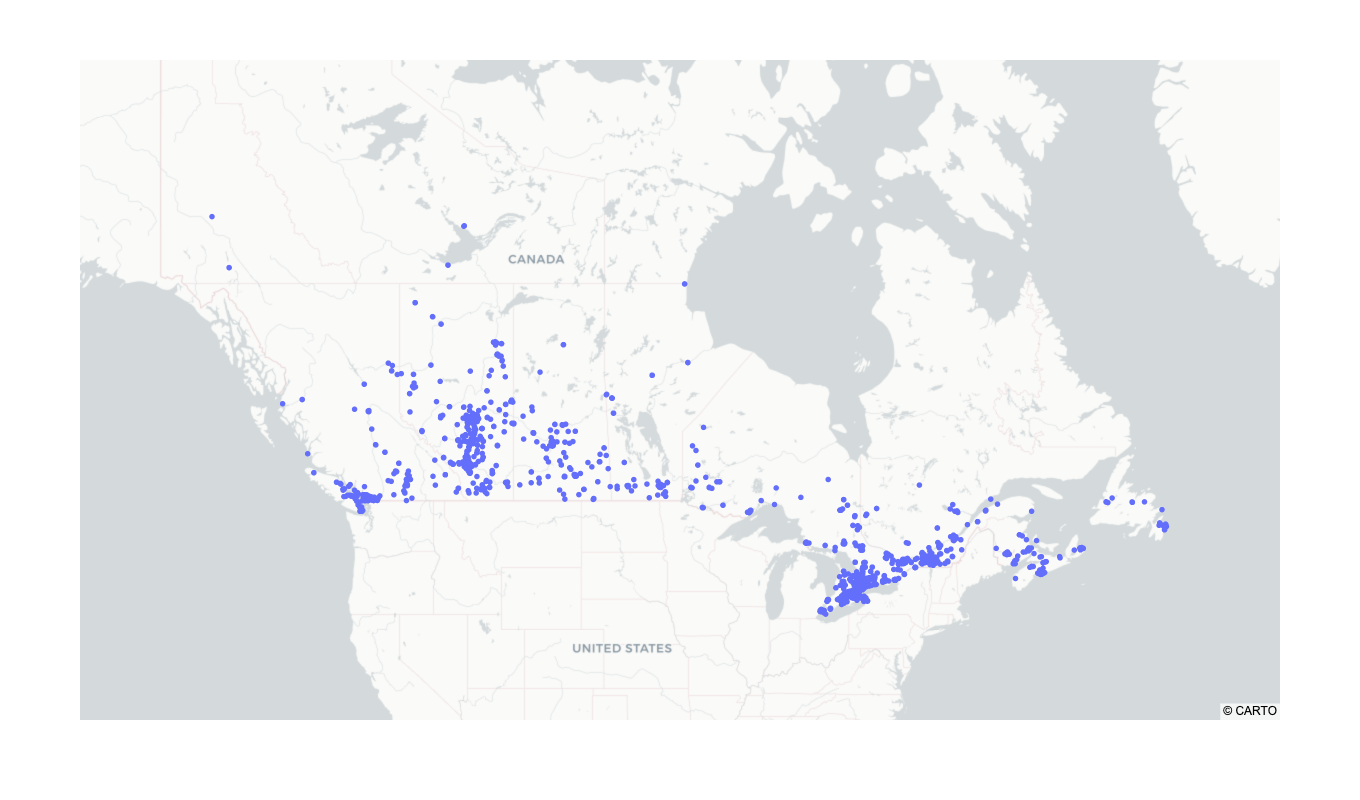

In [232]:
# plot requests on the map to see distribution
fig = px.scatter_mapbox(dfDistPOI,
                        lat='Latitude',
                        lon="Longitude",
                        zoom=3,
                        mapbox_style="carto-positron", 
                        center = {'lat':55, 'lon':-95.4045431},
                        height=800
                       )
fig.update_geos(fitbounds="locations", visible=True)
fig.show()

In [233]:
from functools import partial
import pyproj
import shapely
from shapely.ops import transform
from shapely.geometry import Point, Polygon
import math
import json
# import geojson

POIListReqDist = POIListReqDist.reset_index(drop=True)

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')

# function to calculate coordinates of a circle drawn around a point with a certain radius
# solution from https://gis.stackexchange.com/questions/289044/creating-buffer-circle-x-kilometers-from-point-using-python

def geodesic_point_buffer(x):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat = x.lat, lon = x.lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(math.ceil(x['Req_radius [km]']) * 1000)  # distance in metres
    buff_geojson = {
        'type': 'Feature',
        'geometry': shapely.geometry.mapping(shapely.geometry.Polygon(transform(project, buf).exterior.coords[:])),
        'properties': {"name": x['POIID']}
    }

    buff_geojson = json.loads(json.dumps(buff_geojson, indent=2))
    return buff_geojson

POIListReqDist['POI_req_buff_geom'] = POIListReqDist.apply(geodesic_point_buffer, axis=1)
POIListReqDist

,POIID,lat,lon,POI_dist_mean [km],POI_dist_std [km],Req_radius [km],Req_nr,POI_req_buff_geom
0,POI1,53.546167,-113.485734,294.308,285.695,1689.531,9719,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
1,POI3,45.521629,-73.566024,452.660,224.124,1500.454,9796,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
2,POI4,45.224830,-63.232729,238.821,225.297,857.255,462,"{'type': 'Feature', 'geometry': {'type': 'Poly..."


In [234]:
# create FeatureCollection series to use in map
buff_list = {
        'type': 'FeatureCollection',
        'features': POIListReqDist['POI_req_buff_geom'].to_list()
}

print(buff_list['features'][0])

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-88.98968402370488, 50.92410984890726], [-89.84549136402035, 49.55642444567048], [-90.84615554599061, 48.23826392508114], [-91.97631259606777, 46.977435593773215], [-93.22225088849079, 45.78111092821939], [-94.57162779920014, 44.65588391806337], [-96.01321988575998, 43.60781111412018], [-97.53670678763905, 42.6424367541493], [-99.13248710158385, 41.76480596059676], [-100.79152358729176, 40.97946866221007], [-102.50521471842941, 40.29047659509453], [-104.26528952760565, 39.701375482243556], [-106.0637227381182, 39.2151942610993], [-107.89266724317108, 38.83443301203096], [-109.74440104446089, 38.56105102391607], [-111.61128578409806, 38.39645620646994], [-113.48573399999995, 38.341496816647464], [-115.36018221590189, 38.39645620646995], [-117.22706695553904, 38.56105102391607], [-119.07880075682885, 38.83443301203094], [-120.90774526188173, 39.215194261099285], [-122.70617847239428, 39.701375482243535], [-124.46625328

In [235]:
# calculate polygon area after: https://stackoverflow.com/questions/4681737/how-to-calculate-the-area-of-a-polygon-on-the-earths-surface-using-python

from shapely.geometry import shape

def calc_area(pol):
    lon, lat = zip(*pol['POI_req_buff_geom']['geometry']['coordinates'][0])
    proj = pyproj.Proj("+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")
    x, y = proj(lon, lat)
    proj_pol = {"type": "Polygon", "coordinates": [zip(x, y)]}
    return shape(proj_pol).area / 1000000 #covert in km2

POIListReqDist['POI_req_area [km2]'] = POIListReqDist.apply(calc_area, axis=1)
POIListReqDist

,POIID,lat,lon,POI_dist_mean [km],POI_dist_std [km],Req_radius [km],Req_nr,POI_req_buff_geom,POI_req_area [km2]
0,POI1,53.546167,-113.485734,294.308,285.695,1689.531,9719,"{'type': 'Feature', 'geometry': {'type': 'Poly...",8.906266e+06
1,POI3,45.521629,-73.566024,452.660,224.124,1500.454,9796,"{'type': 'Feature', 'geometry': {'type': 'Poly...",7.034104e+06
2,POI4,45.224830,-63.232729,238.821,225.297,857.255,462,"{'type': 'Feature', 'geometry': {'type': 'Poly...",2.305535e+06


In [236]:
POIListReqDist = POIListReqDist.drop(columns=['POI_req_buff_geom'])
POIListReqDist

,POIID,lat,lon,POI_dist_mean [km],POI_dist_std [km],Req_radius [km],Req_nr,POI_req_area [km2]
0,POI1,53.546167,-113.485734,294.308,285.695,1689.531,9719,8.906266e+06
1,POI3,45.521629,-73.566024,452.660,224.124,1500.454,9796,7.034104e+06
2,POI4,45.224830,-63.232729,238.821,225.297,857.255,462,2.305535e+06


In [237]:
POIListReqDist['POI_req_dens [req/km2]'] = POIListReqDist['Req_nr'] / POIListReqDist['POI_req_area [km2]']
POIListReqDist

,POIID,lat,lon,POI_dist_mean [km],POI_dist_std [km],Req_radius [km],Req_nr,POI_req_area [km2],POI_req_dens [req/km2]
0,POI1,53.546167,-113.485734,294.308,285.695,1689.531,9719,8.906266e+06,0.001091
1,POI3,45.521629,-73.566024,452.660,224.124,1500.454,9796,7.034104e+06,0.001393
2,POI4,45.224830,-63.232729,238.821,225.297,857.255,462,2.305535e+06,0.000200


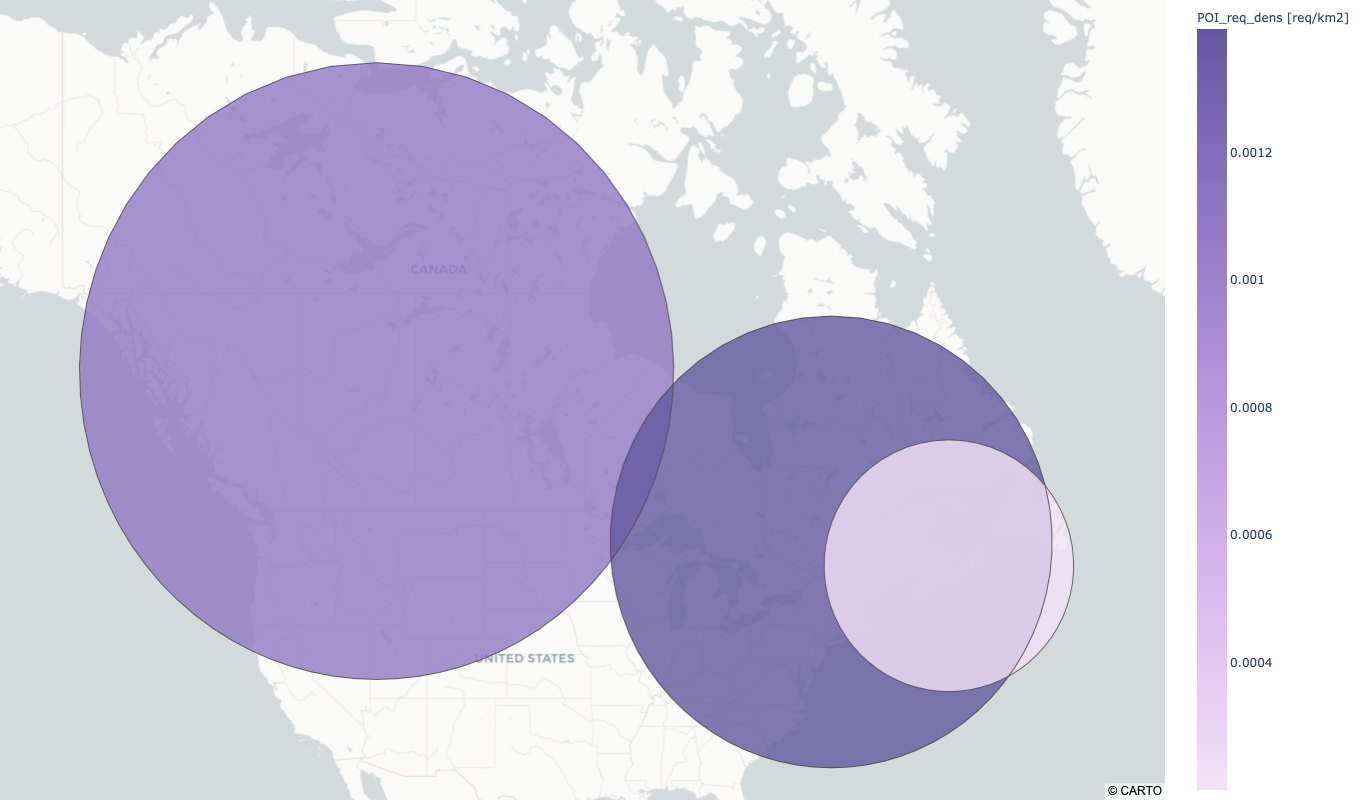

In [238]:
# plot request circles for each POI; colour intensity based on POI_req_dens
fig = px.choropleth_mapbox(POIListReqDist, 
                           geojson=buff_list, 
                           color='POI_req_dens [req/km2]',
                           locations='POIID',
                           featureidkey="properties.name",
                           hover_name="POIID",
                           center = {'lat':55, 'lon':-95.4045431},
                           mapbox_style="carto-positron",
                           zoom=3,
                           color_continuous_scale="purp",
                           opacity=0.8,
                           height=800)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()